## Import

In [2]:
import pandas as pd
import numpy as np
from copy import deepcopy
import seaborn as sns
import sklearn
# from node import node
from scipy import stats
import json
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns

## Reading

In [4]:
S_A = pd.read_csv("../TCI/../TCI/EM/Input/S_A.csv", index_col=0, header=0)
S_D = pd.read_csv("../TCI/../TCI/EM/Input/S_D.csv", index_col=0, header=0)

In [5]:
A_Dt = pd.read_csv("../TCI/../TCI/EM/Input/A_Do.csv", index_col=0, header=0)

In [4]:
A_Dt = pd.read_csv("../TCI/EM/Input/A_Df/A_Df5.csv", index_col=0, header=0)
S_At =  pd.read_csv("../TCI/EM/Output/A_Df/S_Af5_0.csv", index_col=0, header=0)
with open("../TCI/EM/Output/A_Df/S_Af5_0_lh.txt", "r") as outfile:
    lht = json.load(outfile)
S_At_10 =  pd.read_csv("../TCI/EM/Output/A_Df/S_Af5_0_10.csv", index_col=0, header=0)

A_Dt_rd_l = []
S_At_rd_l = []
S_At_rd_10_l = []
lht_rd_l = []
for i in range(1):
    A_Dt_rd = pd.read_csv("../TCI/EM/Input/A_Df_rd/A_Df5_rd_%i"%i+".csv", index_col=0, header=0)
    A_Dt_rd_l.append(A_Dt_rd)
    S_At_rd = pd.read_csv("../TCI/EM/Output/A_Df_rd/S_Af5_rd_%i"%i+".csv", index_col=0, header=0)
    S_At_rd_l.append(S_At_rd)
    S_At_rd_10 = pd.read_csv("../TCI/EM/Output/A_Df_rd/S_Af5_rd_10_%i"%i+".csv", index_col=0, header=0)
    S_At_rd_10_l.append(S_At_rd_10)
    with open("../TCI/EM/Output/A_Df_rd/S_Af5_rd_lh_%i"%i+".txt", "r") as outfile:
        S_At_rd_lh = json.load(outfile)
        lht_rd_l.append(S_At_rd_lh)

In [4]:
A_Dt = pd.read_csv("../TCI/EM/Input/A_Do.csv", index_col=0, header=0)
S_At =  pd.read_csv("../TCI/EM/Output/A_Do/S_Ao.csv", index_col=0, header=0)
S_At_10 =  pd.read_csv("../TCI/EM/Output/A_Do/S_Ao_10.csv", index_col=0, header=0)

A_Dt_rd_l = []
S_At_rd_l = []
S_At_rd_10_l = []
lht_rd_l = []
for i in range(3):
    A_Dt_rd = pd.read_csv("../TCI/EM/Input/A_Do_rd/A_Do_rd_%i"%i+".csv", index_col=0, header=0)
    A_Dt_rd_l.append(A_Dt_rd)
    S_At_rd = pd.read_csv("../TCI/EM/Output/A_Do_rd/S_Ao_rd_%i"%i+".csv", index_col=0, header=0)
    S_At_rd_l.append(S_At_rd)
    S_At_rd_10 = pd.read_csv("../TCI/EM/Output/A_Do_rd/S_Ao_rd_10_%i"%i+".csv", index_col=0, header=0)
    S_At_rd_10_l.append(S_At_rd_10)
    with open("../TCI/EM/Output/A_Do_rd/S_Ao_rd_lh_%i"%i+".txt", "r") as outfile:
        S_At_rd_lh = json.load(outfile)
        lht_rd_l.append(S_At_rd_lh)

## Heatmap

In [ ]:
import matplotlib.pyplot as plt
import pandas
import seaborn.apionly as sns
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
S_Atd =  S_At> 0.5
f = sns.clustermap(S_Atd)

S_Atm[S_Atm>1] = 2
S_Atm = S_Atm.iloc[f.dendrogram_row.reordered_ind, f.dendrogram_col.reordered_ind]

In [ ]:
sns.set(font_scale=0.8)
# For only three colors, it's easier to choose them yourself.
# If you still really want to generate a colormap with cubehelix_palette instead,
# add a cbar_kws={"boundaries": linspace(-1, 1, 4)} to the heatmap invocation
# to have it generate a discrete colorbar instead of a continous one.
myColors = ('whitesmoke', 'red', 'royalblue')
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

# Plot
ax = sns.heatmap(S_Atm, cmap=cmap, cbar_kws={"shrink": .2})

# X - Y axis labels and ticks
ax.set_title('EM result Cluster')
ax.set_ylabel('Sample ID')
ax.set_xlabel('SGAs')
ax.set_yticks([])
ax.set_xticks([])

# Manually specify colorbar labelling after it's been generated
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.33, 1, 1.66])
colorbar.set_ticklabels(['Normal', 'Protein State Change', 'Mutation'])

## fold change

Text(0.5, 0, 'SGA-DEG relationship')

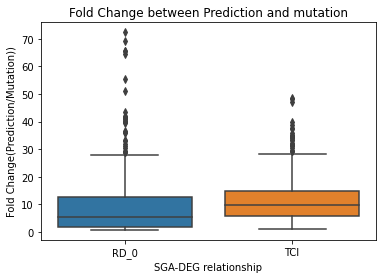

In [5]:
fc_t = [np.sum(ele)/np.sum(S_A[A_Dt.index]) for ele in S_At_rd_l]
fc_df = pd.DataFrame(fc_t, index=['RD'+'_%i'%i for i in range(len(S_At_rd_l))]).T
fc_df.loc[:,'TCI'] = np.sum(S_At)/np.sum(S_A[A_Dt.index])
ax = sns.boxplot(data=fc_df)
ax.set_title('Fold Change between Prediction and mutation')
ax.set_ylabel('Fold Change(Prediction/Mutation))')
ax.set_xlabel('SGA-DEG relationship')

## likelihood

Text(0.5, 0, 'SGA-DEG relationship')

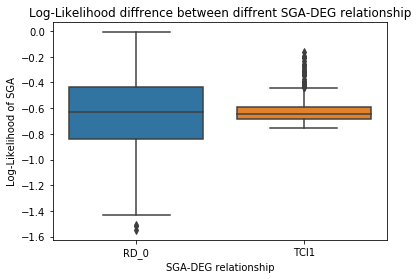

In [23]:
lh_t = [[ele[-1]/5 for ele in ele_l] for ele_l in lht_rd_l] 
lh_df = pd.DataFrame(lh_t, index=['RD'+'_%i'%i for i in range(len(S_At_rd_l))], columns=A_Dt.index).T
lh_df.loc[:,'TCI1'] = [ele[-1]/5 for ele in lht]
ax = sns.boxplot(data=lh_df)
ax.set_title('Log-Likelihood diffrence between diffrent SGA-DEG relationship')
ax.set_ylabel('Log-Likelihood of SGA')
ax.set_xlabel('SGA-DEG relationship')

## 10 fold em recall

In [6]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [7]:
# HNSC
S_A = pd.read_csv("chunhui/Input/HNSC/SGAmatrix.HNSC.csv", header=0, index_col=0)
S_A.index = [ele[0:12] for ele in S_A.index]

S_D = pd.read_csv("chunhui/Input/HNSC/DEGmatrix.HNSC.csv", header=0, index_col=0)
S_D.index = [ele[0:12] for ele in S_D.index]

A_D = pd.read_csv("chunhui/Input/HNSC/DriverDEGmatrix.HNSC.csv", header=0, index_col=0)
A_D[A_D>0] = 1
A_D.to_csv("chunhui/Input/HNSC/A_D.csv", index=True, header=True)

In [8]:
S_Ai = pd.read_csv("chunhui/Input/HNSC/SGA/SGA_0.csv", header=0, index_col=0)

In [9]:
S_P = pd.read_csv("chunhui/Output/HNSC/S_P10.csv", header=0, index_col=0)

S_Pa_l = []
S_Pd_l = []
S_Pad_l = []
for i in range(3):
    S_Pa = pd.read_csv("chunhui/Input/HNSC/SGA/S_P10_%i.csv" % i, header=0, index_col=0)
    S_Pa_l.append(S_Pa)
    S_Pa_m = [np.mean(S_Pa_l)]
    S_Pd = pd.read_csv("chunhui/Input/HNSC/DEG/S_P10_%i.csv" % i, header=0, index_col=0)
    S_Pd_l.append(S_Pd)
    S_Pd_m = np.mean(S_Pd_l,1 )
    S_Pad = pd.read_csv("chunhui/Input/HNSC/AD/S_P10_%i.csv" % i, header=0, index_col=0)
    S_Pad_l.append(S_Pad)
    S_Pad_m = [np.mean(S_Pad_l)]


Text(0, 0.5, 'Mutation Recall')

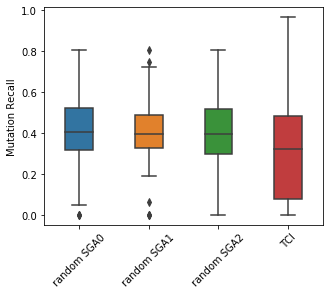

In [53]:
l_l = S_Pad_l
ridx = ["random SGA-DEG"+'%i'%i for i in range(len(l_l))]

recall_l = [[sklearn.metrics.recall_score(S_A[i], (ele[i]>0.5)) for i in S_A.columns] for ele in l_l]
recall_df = pd.DataFrame(recall_l, index= ridx ).T
recall_df.loc[:,'TCI'] = [sklearn.metrics.recall_score(S_A[i], (S_P[i]>0.5)) for i in S_A.columns] 

plt.figure(figsize=(5,4))
plt.xticks(rotation=45)
ax = sns.boxplot(data=recall_df,width=0.4,)
# ax.set_title('Mutation Recall after 10-fold EM')
ax.set_ylabel('Mutation Recall')
# ax.set_xlabel('SGA-DEG relationship')

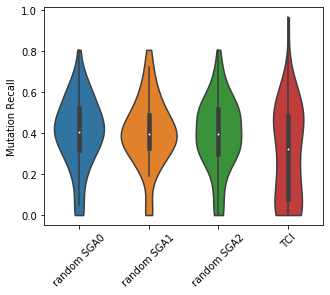

In [55]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=45)
a = deepcopy(recall_df)
a["melt"] = 1
b = pd.melt(a,id_vars=["melt"])
g = sns.violinplot(x="variable", y="value", data=b, cut=0)
# g.set_ylim([0,1])
g.set_xlabel(None)
g.set_ylabel("Mutation Recall")
plt.savefig("HNSC_plot/SGADEG_Muation_Recall.png", dpi=600)

In [11]:
stats.f_oneway(recall_df.iloc[:,1], recall_df.iloc[:,3])

F_onewayResult(statistic=7.720769967551824, pvalue=0.006294737746823769)

/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:

Ttest_indResult(statistic=1.096693345723086, pvalue=0.27487202646092357)


/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Mutation Precision')

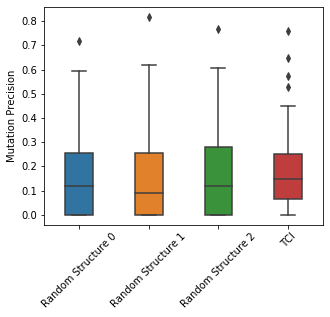

In [42]:
precision_l = [[sklearn.metrics.precision_score(S_A[i], (ele[i]>0.5)) for i in S_A.columns] for ele in l_l]
precision_df = pd.DataFrame(precision_l, index=['Random Structure'+' %i'%i for i in range(len(l_l))]).T
precision_df.loc[:,'TCI'] = [sklearn.metrics.precision_score(S_A[i], (S_P[i]>0.5)) for i in S_A.columns] 
print(stats.ttest_ind(a=precision_df["TCI"],b=precision_df["Random Structure 0"],equal_var=False))

plt.figure(figsize=(5,4))
plt.xticks(rotation=45)
ax = sns.boxplot(data=precision_df, width=0.4,)
# ax.set_title('Mutation Recall after 10-fold EM')
ax.set_ylabel('Mutation Precision')
# ax.set_xlabel('SGA-DEG relationship')

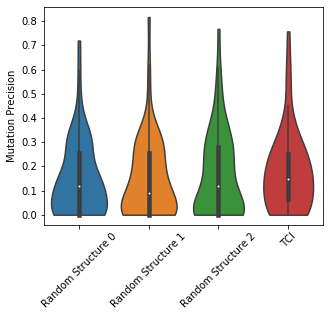

In [46]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=45)
a = deepcopy(precision_df)
a["melt"] = 1
b = pd.melt(a,id_vars=["melt"])
g = sns.violinplot(x="variable", y="value", data=b, cut=0)
# g.set_ylim([0,1])
g.set_xlabel(None)
g.set_ylabel("Mutation Precision")
plt.savefig("HNSC_plot/Muation_Precision.png", dpi=600)

## Roboust F1

In [18]:
edge = pd.read_csv("../TCI/EM/Input/paper_edge.csv", index_col=None, header=0)
S_Arob = deepcopy(S_A[S_A.columns])
node_l = []
for i in edge.index:
    for idx in S_Arob.index:
        if edge.loc[i, "Source"] in S_Arob.columns:
            node_l.append(edge.loc[i, "Source"])
            if S_Arob.loc[idx, edge.loc[i, "Source"]] == 1:
                if edge.loc[i, "Target"] in S_Arob.columns:
                    node_l.append(edge.loc[i, "Target"])
                    S_Arob.loc[idx, edge.loc[i, "Target"]] == 1
node_l = list(set(node_l))

Ttest_indResult(statistic=1.9318281547671843, pvalue=0.05627721577495029)


Text(0, 0.5, 'Roboust f1')

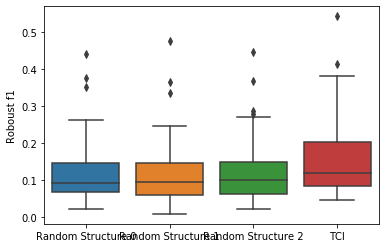

In [20]:
f1_l = [[sklearn.metrics.f1_score(S_Arob[i], (ele[i]>0.5), zero_division='warn') for i in node_l] for ele in S_At_rd_l]
f1_df = pd.DataFrame(f1_l, index=['Random Structure'+' %i'%i for i in range(len(S_At_rd_l))]).T
f1_df.loc[:,'TCI'] = [sklearn.metrics.f1_score(S_Arob[i], (S_At[i]>0.5)) for i in node_l] 
print(stats.ttest_ind(a=f1_df["TCI"],b=f1_df["Random Structure 0"],equal_var=False))
ax = sns.boxplot(data=f1_df)
# ax.set_title('Roboust Test')
ax.set_ylabel('Roboust f1')
# ax.set_xlabel('SGA-DEG relationship')

In [21]:
np.mean(f1_df)

Random Structure 0    0.118798
Random Structure 1    0.122836
Random Structure 2    0.122709
TCI                   0.156258
dtype: float64

## DEG states

In [ ]:
from sklearn.model_selection import KFold
S_Dor_l = []
for i in range(3):
    S_Aor = pd.read_csv("../TCI/EM/Output/S_Ator_%i"%i+".csv", index_col=0, header=0)
    A_Dr = pd.read_csv('../TCI/EM/Input/A_D_trd/A_D_trd_%i'%i+'.csv', header=0, index_col=0)
    S_Dor = antiEM(S_Aor, S_D[A_Dr.columns], A_Dr)
    S_Dor_l.append(pd.DataFrame(S_Dor, index=S_D.index, columns=S_D.columns))

In [ ]:
S_Do = antiEM(S_Ao, S_D[A_Dna.columns], A_Dna)

In [ ]:
from sklearn.metrics import f1_score
f1_l = [[sklearn.metrics.f1_score(S_D[ele], S_Dor[ele]>0.5) for ele in A_Dna.columns] for S_Dor in S_Dor_l]
f1_df = pd.DataFrame(f1_l, index=['RD'+'_%i'%i for i in range(len(S_Dor_l))]).T
f1_df.loc[:,'TCI'] = [sklearn.metrics.f1_score(S_D[ele], (S_Do[ele]>0.5)) for ele in A_Dna.columns] 

ax = sns.boxplot(data=f1_df)
ax.set_title('DEG Prediction')
ax.set_ylabel('f1')
ax.set_xlabel('SGA-DEG relationship')

## GMM

In [ ]:
GDSCexp = pd.read_csv('DrugNormal/Input/GDSC expression.csv', header=0, index_col=0)
TCGAexp = pd.read_csv('DrugNormal/Input/TCGA expression.csv', header=0, index_col=0)
trep = pd.read_csv("DrugNormal/Input/GDSC drug response.csv", header=0, index_col=0)
S_Dc = pd.read_csv("DrugNormal/Output/nGDSCexp.csv", header=0, index_col=0)
S_Ac =pd.read_csv("DrugNormal/Output/nGDSCmut.csv", header=0, index_col=0)

GDSC_tissue_type = pd.read_csv("DrugNormal/Input/GDSC tissue type annotation.csv", header=0, index_col=0)
TCGA_tissue_type = pd.read_csv("DrugNormal/Input/tcga_Subtype.csv", header=0, index_col=0)
A_Do = pd.read_csv("../TCI/EM/Input/A_Do.csv", header=0, index_col=0)

paper_deg = ["FLJ22662", "AREG", "CORO1C", "AVEN", "DUSP3", "DJ473B4", "PHLDA2", "RBM7", "OSMR", 
 "GCLC", "COL4A3BP", "ARFIP2", "C10orf9", "NIP30", "KIAA0776", "SLC35F2", "GAMLG", 
 "NOC4", "PDZK1", "DIS3", "CGI-48", "CPSF6", "KIF3C", "CD9", "LRRC8", "SNF1LK", 
 "CRA", "EGR2", "KRT13", "BCAT1", "SDCCAG3", "PIGK", "MRPS9", "ASPM", "ACBD3", 
 "ZNF325", "LOC285513", "TSSC1", "XAB1", "HNLF", "EIF4EBP2", "MGC23280", "SSA2", 
 "PRKACA", "FEZ2", "SRRM1", "PDGFRL", "SNX13", "KIAA0258", "TOM7"]

nsl = [1287381,905949,906791,906805,687777,724859,905970,1503369,1503370,
1247873,1240145,1290908,1240146,905972,907786,753592,724866,1298347,
687794,753600,1298348,908472,687798,687799,687800,910900,908473,687802,
722058,908475,1298350,724868,908463,687807,1240185,924244,908476,724873,
1240187,722045,687812,724834,722046,687816,724874,905942,687819,687820,
687821,1240190,905967,908465,908460,905944,722066,910399,753608,1240202,
1298537,910931,909721,724878,713869,753554,753556,1240142,1240143,753569,
1298223,687787,1298226,1240183,687815,905941,908443,1298538,909728,724879]

# Plot

trep = pd.read_csv("DrugNormal/Input/GDSC drug response.csv", header=0, index_col=0)
hnsc = tissue_type.loc[tissue_type["TCGA Label"] == "HNSC", :]["COSMIC ID"]
rep = trep.loc[hnsc,:]
np.sum(rep["1010"])

sga = "EGFR"
dg = "1010"
deg_l = set([ele for ele in A_Do if A_Do.loc[sga, ele]==1]) & set(GDSCexp.columns)
rep_l = [idx for idx in rep.index if rep.loc[idx, dg]==1]
nrep_l =  [idx for idx in rep.index if rep.loc[idx, dg]==0]
rep_exp = GDSCexp.loc[rep_l, :]
nrep_exp = GDSCexp.loc[nrep_l, :]

stats_l = []
de_l = []
for deg in rep_exp.columns:
# for deg in deg_l:
    rsv1 = rep_exp[deg]
    rsv2 = nrep_exp[deg]
    p = stats.ttest_ind(rsv1,rsv2)
    stats_l.append(p)
    if p[1]<0.01:
        de_l.append(deg)
de_l = set(de_l) & set(S_Dc.columns)

sns.clustermap(pd.concat([S_Dc.loc[rep_l, deg_l], S_Dc.loc[nrep_l, deg_l]], 0).T, col_cluster=False)

X  = pd.concat([rep_exp[de_l], nrep_exp[de_l]], 0)

from sklearn import mixture
import matplotlib.pyplot as plt
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full', 
                              weights_init=[0.999, 0.001]).fit(X)
prediction = gmm.predict(X)
print(prediction)
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=prediction, s=10, cmap='viridis')

sns.clustermap(GDSCexp[["CDK4", "RB1","E2F3", "TP53","CCND1", "CDKN2A", "CDKN2B","MDM4"]])

sns.clustermap(GDSCexp[["CDK4", "RB1","E2F3", "TP53","CCND1", "CDKN2A", "CDKN2B","MDM4"]])

# TCGA

idx = TCGA_tissue_type.loc[TCGA_tissue_type["X_primary_disease_id"] == 4,:].index
st_exp = TCGAexp.loc[idx & TCGAexp.index, :]

sga_l = []
for sga in A_Do.index:
    deg_l = [deg for deg in A_Do.columns if A_Do.loc[sga, deg]==1]
    deg_l = set(TCGAexp.columns) & set(deg_l)
    sga_exp = st_exp[deg_l].values
    gmm = mixture.GaussianMixture(n_components=2, covariance_type='full', weights_init=[0.1, 0.9]).fit(sga_exp)
    prediction = gmm.predict(sga_exp)
    sga_l.append(prediction)
st_act  =  pd.DataFrame(sga_l, index=A_Do.index, columns=st_exp.index).T

sns.clustermap(st_act[["CDK4", "RB1","E2F3", "TP53","CCND1", "CDKN1A", "CDKN2A", "CDKN2B"]])

sns.clustermap(TCGAexp.loc[:, ["CDK4", "RB1","E2F3", "TP53","CCND1", "CDKN2A", "CDKN2B"]])

S_Aoo = pd.read_csv("../TCI/EM/Output/S_Aoo.csv", index_col=0, header=0)
S_Ao4 = pd.read_csv("../TCI/EM/Output/A_Di/S_Ad_4.csv", index_col=0, header=0)

sns.clustermap(S_Aoo.loc[:, ["CDK4", "RB1","E2F3", "TP53","CCND1", "CDKN1A", "CDKN2A", "CDKN2B"]])

a  = TCGAexp[["CDK4", "RB1","E2F3", "TP53","CCND1", "CDKN2A", "CDKN2B"]].T
a.to_csv("arcne_matrix_tp53.txt", index=True, header=True)

np.savetxt('arcne_lis_tp53.txt',a.index, fmt='%s')   # use exponential notation